In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [3]:
HABERMAN_path="/content/drive/My Drive/haberman.csv"

In [4]:
#Load haberman.csv into a pandas dataFrame.
HABERMAN = pd.read_csv(HABERMAN_path)
# (Q) how many data-points and features?
print (HABERMAN.shape)

(305, 4)


Observations:There are 305 rows and 4 columns in our dataset which includes class label

In [5]:
#(Q) What are the column names in our dataset?
print (HABERMAN.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


Above Index Explanation:

30 represents age of patient at the time of operation

64 represents year of operation

1 represents number of nodes detected

1.1 represents status of patient 1 means the patient survived 5 years or longer 2 means the patient died within 5 year

We should rename columns for better understanding of data 

In [6]:
HABERMAN = HABERMAN.rename(columns = {"30" : "age", "64" : "operation_year", "1" : "nodes_detected", "1.1" : "survival_status"})

In [7]:
HABERMAN.head()

,age,operation_year,nodes_detected,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


# **SCATTER PLOTS**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


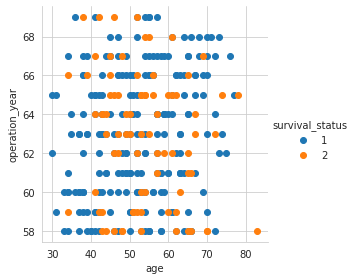

In [8]:

# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(HABERMAN, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "operation_year") \
   .add_legend();
plt.show();



Observarions:

Survival status is low between the age 40 to 60 years.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


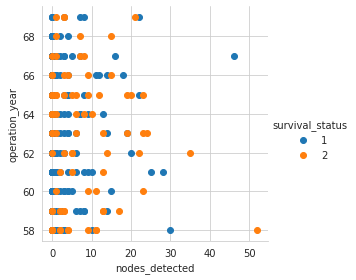

In [9]:
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(HABERMAN, hue="survival_status", size=4) \
   .map(plt.scatter, "nodes_detected", "operation_year") \
   .add_legend();
plt.show();

Observations:

Higher number of deaths survived below 10 nodes of detection.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


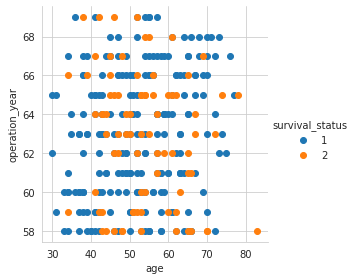

In [10]:

# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(HABERMAN, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "operation_year") \
   .add_legend();
plt.show();

Observations:

Higher deaths recorded in the age between 40 to 60.

# **PAIR PLOTS**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


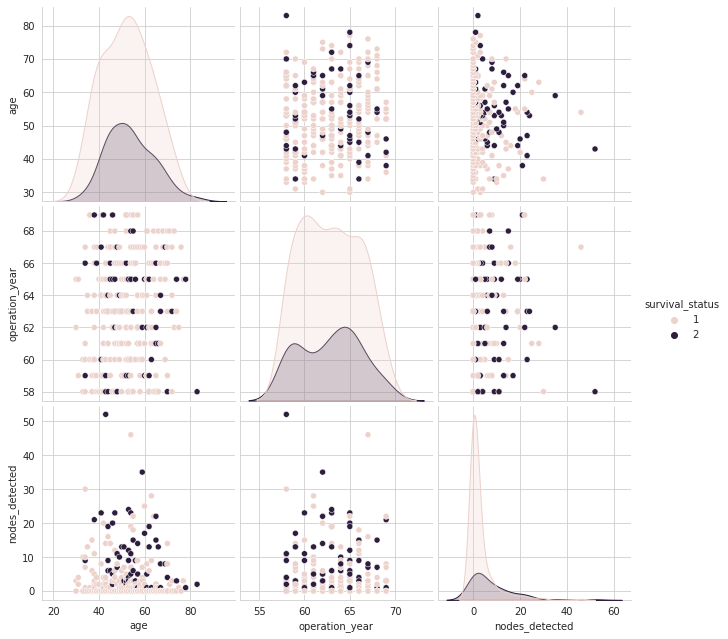

In [11]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(HABERMAN, hue="survival_status", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observations:

1.Age between 40-60 have more deaths with nodes detected below 10.

2.Operation year 1960-65 have recoreded more deaths.

3.irrespective of age persons with 0 nodes detected survived.

# **HISTOGRAM,PDF,CDF**

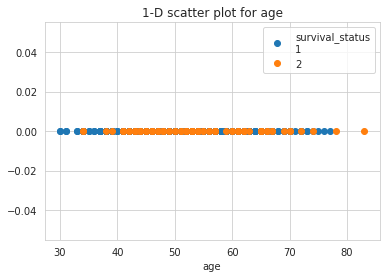

In [12]:

import numpy as np
HABERMAN_survived = HABERMAN.loc[HABERMAN["survival_status"] == 1];
HABERMAN_death = HABERMAN.loc[HABERMAN["survival_status"] == 2];


plt.plot(HABERMAN_survived["age"], np.zeros_like(HABERMAN_survived['age']), 'o',label = "survival_status\n" "1")
plt.plot(HABERMAN_death["age"], np.zeros_like(HABERMAN_death['age']), 'o',label = "2")


plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

Observations: 

Most number of deaths occured at the age between 40 to 70

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


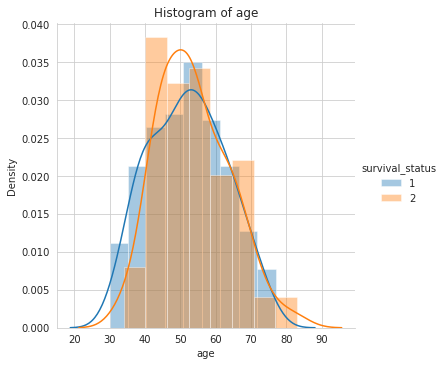

In [13]:
sns.FacetGrid(HABERMAN, hue="survival_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


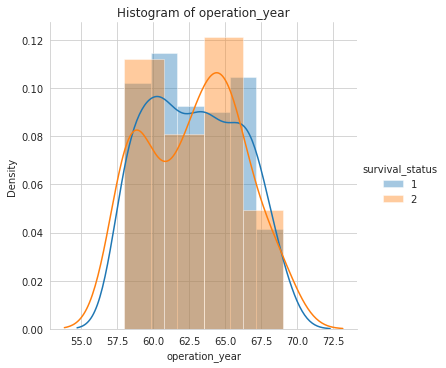

In [14]:
sns.FacetGrid(HABERMAN, hue="survival_status", size=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


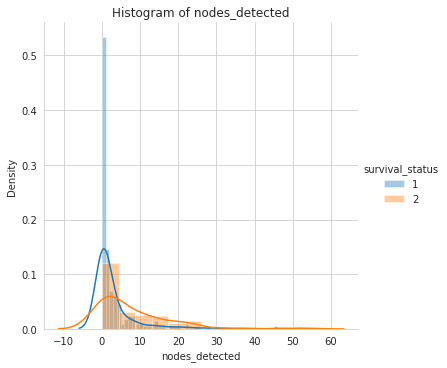

In [15]:
sns.FacetGrid(HABERMAN, hue="survival_status", size=5) \
   .map(sns.distplot, "nodes_detected") \
   .add_legend();
plt.title("Histogram of nodes_detected")
plt.ylabel("Density")
plt.show()

Observatons:

Survival rate is high when nodes detected below 3.


[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


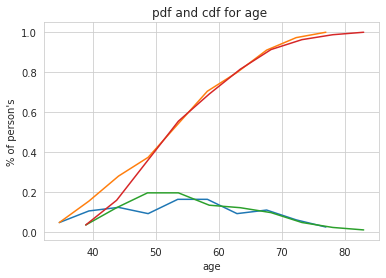

In [22]:

counts, bin_edges = np.histogram(HABERMAN_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(HABERMAN_death['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("pdf and cdf for age ")
plt.xlabel("age")
plt.ylabel("% of person's")
label = ["pdf of HABERMAN_survived", "cdf of HABERMAN_survived", "pdf of HABERMAN_death", "cdf of HABERMAN_death"]

plt.show();

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


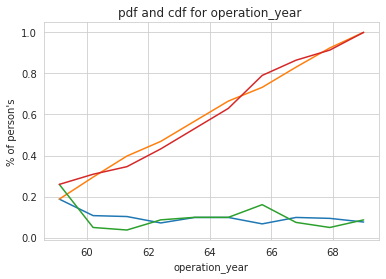

In [23]:
counts, bin_edges = np.histogram(HABERMAN_survived['operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(HABERMAN_death['operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("pdf and cdf for operation_year ")
plt.xlabel("operation_year")
plt.ylabel("% of person's")
label = ["pdf of HABERMAN_survived", "cdf of HABERMAN_survived", "pdf of HABERMAN_death", "cdf of HABERMAN_death"]

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


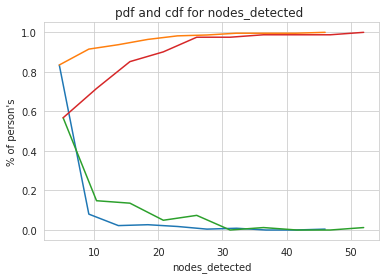

In [24]:
counts, bin_edges = np.histogram(HABERMAN_survived['nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(HABERMAN_death['nodes_detected'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("pdf and cdf for nodes_detected ")
plt.xlabel("nodes_detected")
plt.ylabel("% of person's")
label = ["pdf of HABERMAN_survived", "cdf of HABERMAN_survived", "pdf of HABERMAN_death", "cdf of HABERMAN_death"]

Observations:

Almost 85% survived when nodes detected below 10.

Almost 40% survived when the age below 48.


# **Box plot and Whiskers**

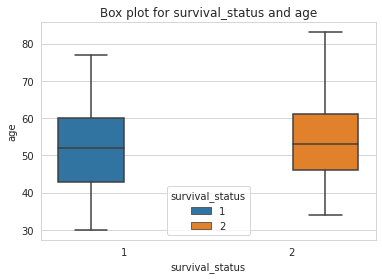

In [27]:
sns.boxplot(x='survival_status',y='age',hue = "survival_status", data=HABERMAN).set_title("Box plot for survival_status and age")
plt.show()

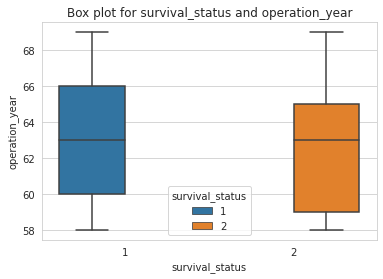

In [30]:
sns.boxplot(x='survival_status',y='operation_year',hue = "survival_status", data=HABERMAN).set_title("Box plot for survival_status and operation_year")
plt.show()

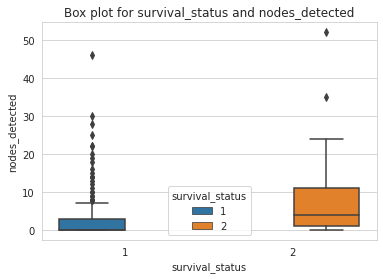

In [29]:
sns.boxplot(x='survival_status',y='nodes_detected',hue = "survival_status", data=HABERMAN).set_title("Box plot for survival_status and nodes_detected")
plt.show()

# Violin plots

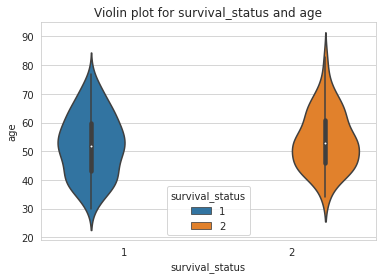

In [34]:

sns.violinplot(x="survival_status", y="age",hue = "survival_status", data=HABERMAN, size=8)
plt.title("Violin plot for survival_status and age")
plt.show()

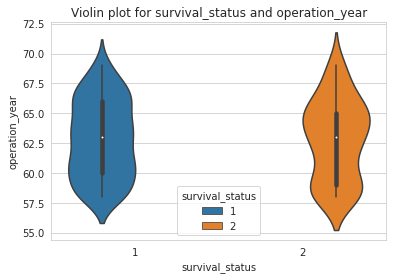

In [35]:
sns.violinplot(x="survival_status", y="operation_year",hue = "survival_status", data=HABERMAN, size=8)
plt.title("Violin plot for survival_status and operation_year")
plt.show()

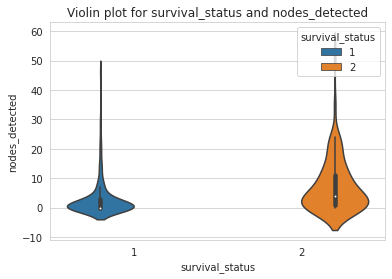

In [36]:
sns.violinplot(x="survival_status", y="nodes_detected",hue = "survival_status", data=HABERMAN, size=8)
plt.title("Violin plot for survival_status and nodes_detected")
plt.show()

# **Mean, Variance, Std-deviation Median, Quantiles, Percentiles, IQR**

In [39]:
#Mean, Variance, Std-deviation,
print("Means:")  
print(np.mean(HABERMAN_survived["age"]))

print(np.mean(HABERMAN_death["age"]))


print("\nStd-dev:");
print(np.std(HABERMAN_survived["age"]))
print(np.std(HABERMAN_death["age"]))

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(HABERMAN_survived["age"]))
print(np.median(HABERMAN_death["age"]))

print("\nQuantiles:")
print(np.percentile(HABERMAN_survived["age"],np.arange(0, 100, 25)))
print(np.percentile(HABERMAN_death["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(HABERMAN_survived["age"],90))
print(np.percentile(HABERMAN_death["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(HABERMAN_survived["age"]))
print(robust.mad(HABERMAN_death["age"]))





Means:
52.11607142857143
53.67901234567901

Std-dev:
10.913004640364269
10.10418219303131

Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(HABERMAN_survived["operation_year"]))
print(np.mean(HABERMAN_death["operation_year"]))


print("\nStd-dev:");
print(np.std(HABERMAN_survived["operation_year"]))
print(np.std(HABERMAN_death["operation_year"]))

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(HABERMAN_survived["operation_year"]))
print(np.median(HABERMAN_death["operation_year"]))

print("\nQuantiles:")
print(np.percentile(HABERMAN_survived["operation_year"],np.arange(0, 100, 25)))
print(np.percentile(HABERMAN_death["operation_year"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(HABERMAN_survived["operation_year"],90))
print(np.percentile(HABERMAN_death["operation_year"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(HABERMAN_survived["operation_year"]))
print(robust.mad(HABERMAN_death["operation_year"]))

Means:
62.857142857142854
62.82716049382716

Std-dev:
3.2220145175061514
3.3214236255207883

Medians:
63.0
63.0

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
4.447806655516806
4.447806655516806


In [41]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(HABERMAN_survived["nodes_detected"]))
print(np.mean(HABERMAN_death["nodes_detected"]))


print("\nStd-dev:");
print(np.std(HABERMAN_survived["nodes_detected"]))
print(np.std(HABERMAN_death["nodes_detected"]))

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(HABERMAN_survived["nodes_detected"]))
print(np.median(HABERMAN_death["nodes_detected"]))

print("\nQuantiles:")
print(np.percentile(HABERMAN_survived["nodes_detected"],np.arange(0, 100, 25)))
print(np.percentile(HABERMAN_death["nodes_detected"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(HABERMAN_survived["nodes_detected"],90))
print(np.percentile(HABERMAN_death["nodes_detected"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(HABERMAN_survived["nodes_detected"]))
print(robust.mad(HABERMAN_death["nodes_detected"]))

Means:
2.799107142857143
7.45679012345679

Std-dev:
5.869092706952767
9.128776076761632

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# **2D Density plot, contors-plot**

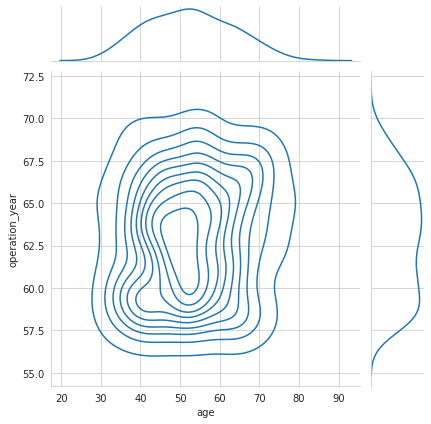

In [42]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="operation_year", data=HABERMAN, kind="kde");
plt.show();

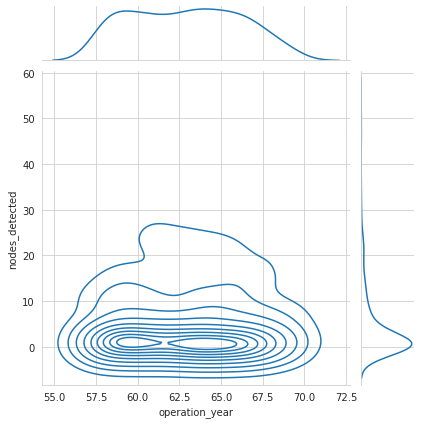

In [43]:
#2D Density plot, contors-plot
sns.jointplot(x="operation_year", y="nodes_detected", data=HABERMAN, kind="kde");
plt.show();

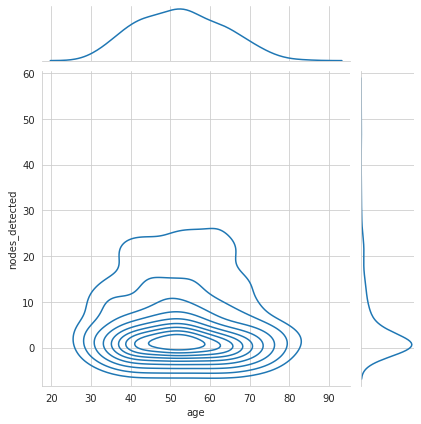

In [44]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes_detected", data=HABERMAN, kind="kde");
plt.show();

SUMMARY OF OBSERVATIONS FROM ABOVE ANALYSIS:

1.Patients survival rate is high when nodes detected below 3 and the average age below 52.

2.Higher number of deaths recorded in the operation year between 1960-1965.

3.Finally age between 40 to 60 and nodes detected below 3 survival rate is high.


